# 1. I would like to work with "The Songs of Scotland Prior to Burns," a song and history book compiled by Robert Chambers and released in 1862. 

In 2011, the National Library of Scotland digitized this beautiful piece of Scotland's history and made it available in 16 different forms on Archive.org.

I would like to make new songs out of the songs in this book through algorithmic (rhythmic, hehe) generation. 

I forsee many challenges using this book as my corpus. First, The archive.org text file is not organized in a way where I can easily delineate song lyrics from prose. Second, the musical notation is translated into characters like this: f ^=^^ Efc^fe^; I cannot figure out what notation or encoding this is... and I would really like to be able to re-translate it back into musical notation. Third, song generation from this large of a file will take a lot of computing power. 

I believe the only way to do this project is to create intermediate, "cleaned-up" version(s) of the text file. I know you (Stefan) did this with Hume's dialogues, so perhaps it is ok for me to do it too? This would ease at least two of my suspected challenges.

# 2. Now for the embedded Voyant Tool!

Bonnie songs love ye <3 

In [11]:
from IPython.display import IFrame

#the following should be a knot diagram for the following words: bonnie, songs, love, ye

IFrame("https://voyant-tools.org/tool/Knots/?query=bonnie&query=songs&query=love&query=ye&docId=23fbed1ce160326b070dccfcd61c59b0&corpus=4812ee8a979a2d16f071a32a06c876bc", width=600, height=300)

In [16]:
import os 
path = "C:\\Users\\paige\\OneDrive\\Documents\\applications\\GitHub\\llcu612\\sspd"
os.chdir(path)
files = os.listdir()
files

['sspb.original']

In [24]:
sspbOpen = open("sspb.original", 'r',encoding="utf-8-sig")
sspb = sspbOpen.read()
sspb[0:200]

str

In [25]:
import nltk

sspbWords=nltk.word_tokenize(sspb.lower())
print(sspbWords[0:20])

['ijlirana^unrox', 'jytrttyitijm^^', ',', '-v', 'c', '&', '/£/fa^', '^', 'i/', 'bet', 'j66/', '&', '.', '&', '*', 'fih*^', 'the', 'songs', 'of', 'scotland']


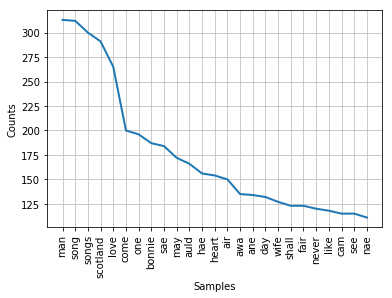

In [36]:
%matplotlib inline

stopwords = nltk.corpus.stopwords.words("English") # load stopwords
#upon first plotting I noticed some words that should have been stopwords
#below I remove them (and I talk about this issue at the end of the code)
newStopWords = ['ye','e','j','thou','thy','thee','wi'] 
stopwords.extend(newStopWords)

#filter words that are alphabetic and not in stopword list
words = [word for word in sspbWords if word[0].isalpha() and not word in stopwords]
freqs = nltk.FreqDist(words) # build frequency list
freqs.plot(25) # plot the top 25 words

Stopwords in SSPB are oftentimes not NLTK's English. I would need an Old English stopword set. It seems like there may be one through http://docs.cltk.org/en/latest/old_english.html
The high instance of J and E came from the musical notation encoding I believe, so I made them stop words and it seems to have fixed the weirdness.

I removed 'ye', 'thou', 'thy', 'thee', and 'wi' because they were not adding anything fun to the graph, though I can see that one may want to keep these tokens in the corpus (and out of the stopwords list). This is why it's good to keep a list of what you've done to the stopwords (as I have in newStopWords) so it is easy to change your mind later. 

Also, I don't necessarily understand the vocabulary in SSPB! I never thought of it being a bit like a different language. Interesting! 

This graph is for the whole text, not just the songs. I may have to create a new version of the text that only includes the songs. As everything is left justified with no discernable patterns of capitalization, punctuation or stanza, regular expressions may not do the trick.

For this hypothetical just-the-songs-file, I may not remove stop words at all. I think this would make sense. 